In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt

In [2]:
oil_return_new_df=\
    pd.read_csv("filtered_data_final.csv")
oil_return_new_df

,date,Brent Futures Adj Close,Brent Futures Volume,Actual,Predicted,Basis,Arbitrage Opportunity,Total Capital,Cumulative Return (%),Daily Return (%)
0,2021-06-28,74.680000,27711.0,72.91,69.321860,6.858140,"Sell Futures, Buy Spot",19164.763889,0.003986,NaN
1,2021-06-29,74.760002,4089.0,72.98,69.860504,4.819496,"Sell Futures, Buy Spot",19169.449924,0.028438,0.024451
2,2021-06-30,75.129997,33596.0,73.47,69.786930,4.973072,"Sell Futures, Buy Spot",19174.527339,0.054933,0.026487
3,2021-07-01,75.839996,52210.0,75.23,68.913970,6.216027,"Sell Futures, Buy Spot",19180.959042,0.088494,0.033543
4,2021-07-02,76.169998,31167.0,75.16,69.237850,6.602146,"Sell Futures, Buy Spot",19187.402377,0.122116,0.033592
...,...,...,...,...,...,...,...,...,...,...
585,2023-10-24,88.070000,42436.0,83.74,83.531770,6.298232,"Sell Futures, Buy Spot",22574.662055,17.797235,0.016746
586,2023-10-25,90.129997,47506.0,85.39,83.262470,4.807530,"Sell Futures, Buy Spot",22580.278184,17.826540,0.024878
587,2023-10-26,87.930000,22662.0,83.21,82.032520,8.097477,"Sell Futures, Buy Spot",22585.225608,17.852357,0.021910
588,2023-10-27,90.480003,21249.0,85.54,79.133540,8.796460,"Sell Futures, Buy Spot",22594.497815,17.900740,0.041054


In [3]:
oil_return_new_df["Arbitrage Opportunity"].value_counts()

Arbitrage Opportunity
Sell Futures, Buy Spot    539
Hold                       42
Buy Futures, Sell Spot      9
Name: count, dtype: int64

In [4]:
gold_return_df=\
    pd.read_csv("df_final.csv")
gold_return_df

,Date,str for gold,Daily Rate,daily_return,str for oil,OIL,str return,GOLD,max_gross_performance,drawdown
0,2021-06-26,1.000000,1.000000,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN
1,2021-06-27,0.999457,1.000000,1.000543,NaN,NaN,NaN,1.000543,NaN,NaN
2,2021-06-28,1.009055,1.000000,0.990397,1.000040,NaN,1.000344,0.990935,1.000344,0.000000
3,2021-06-29,1.013632,1.000245,1.004536,1.000284,1.001071,1.000735,0.995430,1.000735,0.000000
4,2021-06-30,1.010657,1.000265,1.002935,1.000549,1.006026,1.000891,0.998352,1.000891,0.000000
...,...,...,...,...,...,...,...,...,...,...
852,2023-10-26,1.686399,1.000219,1.000553,1.178524,1.177424,1.195682,1.117583,1.195682,0.000000
853,2023-10-27,1.681707,1.000411,1.002782,1.179007,1.211569,1.195991,1.120692,1.195991,0.000000
854,2023-10-28,1.677042,1.000000,1.002774,1.179122,1.198045,1.195944,1.123801,1.195991,0.000039
855,2023-10-29,1.672402,1.000000,1.002767,1.179237,1.184521,1.195898,1.126910,1.195991,0.000078


In [5]:
# gold_return_df=\
#     pd.read_csv("gold_return_new.csv")
# gold_return_df
# oil_return_df=\
#     pd.read_csv("oil_return.csv")

In [6]:
oil_return_df = oil_return_new_df.rename(columns = {"date": "Date"})
oil_return_df

,Date,Brent Futures Adj Close,Brent Futures Volume,Actual,Predicted,Basis,Arbitrage Opportunity,Total Capital,Cumulative Return (%),Daily Return (%)
0,2021-06-28,74.680000,27711.0,72.91,69.321860,6.858140,"Sell Futures, Buy Spot",19164.763889,0.003986,NaN
1,2021-06-29,74.760002,4089.0,72.98,69.860504,4.819496,"Sell Futures, Buy Spot",19169.449924,0.028438,0.024451
2,2021-06-30,75.129997,33596.0,73.47,69.786930,4.973072,"Sell Futures, Buy Spot",19174.527339,0.054933,0.026487
3,2021-07-01,75.839996,52210.0,75.23,68.913970,6.216027,"Sell Futures, Buy Spot",19180.959042,0.088494,0.033543
4,2021-07-02,76.169998,31167.0,75.16,69.237850,6.602146,"Sell Futures, Buy Spot",19187.402377,0.122116,0.033592
...,...,...,...,...,...,...,...,...,...,...
585,2023-10-24,88.070000,42436.0,83.74,83.531770,6.298232,"Sell Futures, Buy Spot",22574.662055,17.797235,0.016746
586,2023-10-25,90.129997,47506.0,85.39,83.262470,4.807530,"Sell Futures, Buy Spot",22580.278184,17.826540,0.024878
587,2023-10-26,87.930000,22662.0,83.21,82.032520,8.097477,"Sell Futures, Buy Spot",22585.225608,17.852357,0.021910
588,2023-10-27,90.480003,21249.0,85.54,79.133540,8.796460,"Sell Futures, Buy Spot",22594.497815,17.900740,0.041054


In [7]:
gold_return_df['Date'] = pd.to_datetime(gold_return_df['Date'], format='%Y-%m-%d')
#gold_return_df['Date'] = pd.to_datetime(gold_return_df['Date'], format='%Y%m%d')
#gold_return_df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
gold_return_df

,Date,str for gold,Daily Rate,daily_return,str for oil,OIL,str return,GOLD,max_gross_performance,drawdown
0,2021-06-26,1.000000,1.000000,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN
1,2021-06-27,0.999457,1.000000,1.000543,NaN,NaN,NaN,1.000543,NaN,NaN
2,2021-06-28,1.009055,1.000000,0.990397,1.000040,NaN,1.000344,0.990935,1.000344,0.000000
3,2021-06-29,1.013632,1.000245,1.004536,1.000284,1.001071,1.000735,0.995430,1.000735,0.000000
4,2021-06-30,1.010657,1.000265,1.002935,1.000549,1.006026,1.000891,0.998352,1.000891,0.000000
...,...,...,...,...,...,...,...,...,...,...
852,2023-10-26,1.686399,1.000219,1.000553,1.178524,1.177424,1.195682,1.117583,1.195682,0.000000
853,2023-10-27,1.681707,1.000411,1.002782,1.179007,1.211569,1.195991,1.120692,1.195991,0.000000
854,2023-10-28,1.677042,1.000000,1.002774,1.179122,1.198045,1.195944,1.123801,1.195991,0.000039
855,2023-10-29,1.672402,1.000000,1.002767,1.179237,1.184521,1.195898,1.126910,1.195991,0.000078


In [8]:
oil_return_df['Date'] = pd.to_datetime(oil_return_df['Date'], format='%Y-%m-%d')
#oil_return_df.rename(columns = {"date": "Date"})
oil_return_df

,Date,Brent Futures Adj Close,Brent Futures Volume,Actual,Predicted,Basis,Arbitrage Opportunity,Total Capital,Cumulative Return (%),Daily Return (%)
0,2021-06-28,74.680000,27711.0,72.91,69.321860,6.858140,"Sell Futures, Buy Spot",19164.763889,0.003986,NaN
1,2021-06-29,74.760002,4089.0,72.98,69.860504,4.819496,"Sell Futures, Buy Spot",19169.449924,0.028438,0.024451
2,2021-06-30,75.129997,33596.0,73.47,69.786930,4.973072,"Sell Futures, Buy Spot",19174.527339,0.054933,0.026487
3,2021-07-01,75.839996,52210.0,75.23,68.913970,6.216027,"Sell Futures, Buy Spot",19180.959042,0.088494,0.033543
4,2021-07-02,76.169998,31167.0,75.16,69.237850,6.602146,"Sell Futures, Buy Spot",19187.402377,0.122116,0.033592
...,...,...,...,...,...,...,...,...,...,...
585,2023-10-24,88.070000,42436.0,83.74,83.531770,6.298232,"Sell Futures, Buy Spot",22574.662055,17.797235,0.016746
586,2023-10-25,90.129997,47506.0,85.39,83.262470,4.807530,"Sell Futures, Buy Spot",22580.278184,17.826540,0.024878
587,2023-10-26,87.930000,22662.0,83.21,82.032520,8.097477,"Sell Futures, Buy Spot",22585.225608,17.852357,0.021910
588,2023-10-27,90.480003,21249.0,85.54,79.133540,8.796460,"Sell Futures, Buy Spot",22594.497815,17.900740,0.041054


In [9]:
gold_return_df["Date"].dtypes

dtype('<M8[ns]')

In [10]:
oil_return_df["Date"].dtypes

dtype('<M8[ns]')

In [11]:

# Merge using the dates from the smaller DataFrame (df2)
merged_df = pd.merge(oil_return_df, gold_return_df, how='right', on='Date')
#merged_df = pd.merge(gold_return_df, oil_return_df, how='right', on='Date')

merged_df

,Date,Brent Futures Adj Close,Brent Futures Volume,Actual,Predicted,Basis,Arbitrage Opportunity,Total Capital,Cumulative Return (%),Daily Return (%),str for gold,Daily Rate,daily_return,str for oil,OIL,str return,GOLD,max_gross_performance,drawdown
0,2021-06-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN
1,2021-06-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.999457,1.000000,1.000543,NaN,NaN,NaN,1.000543,NaN,NaN
2,2021-06-28,74.680000,27711.0,72.91,69.321860,6.858140,"Sell Futures, Buy Spot",19164.763889,0.003986,NaN,1.009055,1.000000,0.990397,1.000040,NaN,1.000344,0.990935,1.000344,0.000000
3,2021-06-29,74.760002,4089.0,72.98,69.860504,4.819496,"Sell Futures, Buy Spot",19169.449924,0.028438,0.024451,1.013632,1.000245,1.004536,1.000284,1.001071,1.000735,0.995430,1.000735,0.000000
4,2021-06-30,75.129997,33596.0,73.47,69.786930,4.973072,"Sell Futures, Buy Spot",19174.527339,0.054933,0.026487,1.010657,1.000265,1.002935,1.000549,1.006026,1.000891,0.998352,1.000891,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
852,2023-10-26,87.930000,22662.0,83.21,82.032520,8.097477,"Sell Futures, Buy Spot",22585.225608,17.852357,0.021910,1.686399,1.000219,1.000553,1.178524,1.177424,1.195682,1.117583,1.195682,0.000000
853,2023-10-27,90.480003,21249.0,85.54,79.133540,8.796460,"Sell Futures, Buy Spot",22594.497815,17.900740,0.041054,1.681707,1.000411,1.002782,1.179007,1.211569,1.195991,1.120692,1.195991,0.000000
854,2023-10-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.677042,1.000000,1.002774,1.179122,1.198045,1.195944,1.123801,1.195991,0.000039
855,2023-10-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.672402,1.000000,1.002767,1.179237,1.184521,1.195898,1.126910,1.195991,0.000078


In [21]:
gold_return_df

,Date,str for gold,Daily Rate,daily_return,str for oil,OIL,str return,GOLD,max_gross_performance,drawdown
0,2021-06-26,1.000000,1.000000,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN
1,2021-06-27,0.999457,1.000000,1.000543,NaN,NaN,NaN,1.000543,NaN,NaN
2,2021-06-28,1.009055,1.000000,0.990397,1.000040,NaN,1.000344,0.990935,1.000344,0.000000
3,2021-06-29,1.013632,1.000245,1.004536,1.000284,1.001071,1.000735,0.995430,1.000735,0.000000
4,2021-06-30,1.010657,1.000265,1.002935,1.000549,1.006026,1.000891,0.998352,1.000891,0.000000
...,...,...,...,...,...,...,...,...,...,...
852,2023-10-26,1.686399,1.000219,1.000553,1.178524,1.177424,1.195682,1.117583,1.195682,0.000000
853,2023-10-27,1.681707,1.000411,1.002782,1.179007,1.211569,1.195991,1.120692,1.195991,0.000000
854,2023-10-28,1.677042,1.000000,1.002774,1.179122,1.198045,1.195944,1.123801,1.195991,0.000039
855,2023-10-29,1.672402,1.000000,1.002767,1.179237,1.184521,1.195898,1.126910,1.195991,0.000078


In [41]:
your_dataframe_cleaned = merged_df[["Daily Return (%)", "str for gold"]]
#your_dataframe_cleaned = gold_return_df[["str for oil", "str for gold"]]
your_dataframe_cleaned = your_dataframe_cleaned.rename(columns = {"Daily Return (%)": "oil_return_rate"})
your_dataframe_cleaned = your_dataframe_cleaned.rename(columns = {"str for gold": "gold_return_rate"})
your_dataframe_cleaned["gold_return_rate"] = your_dataframe_cleaned["gold_return_rate"].diff().iloc[1:]
#your_dataframe_cleaned["oil_return_rate"] = your_dataframe_cleaned["oil_return_rate"]/100 
your_dataframe_cleaned = your_dataframe_cleaned.dropna()
your_dataframe_cleaned

,oil_return_rate,gold_return_rate
3,0.024451,0.004577
4,0.026487,-0.002975
5,0.033543,0.003697
6,0.033592,0.002067
10,0.014514,0.004002
...,...,...
850,0.016746,0.007376
851,0.024878,0.002035
852,0.021910,0.000933
853,0.041054,-0.004692


Returns:
     oil_return_rate  gold_return_rate
3           0.024451          0.004577
4           0.026487         -0.002975
5           0.033543          0.003697
6           0.033592          0.002067
10          0.014514          0.004002
..               ...               ...
850         0.016746          0.007376
851         0.024878          0.002035
852         0.021910          0.000933
853         0.041054         -0.004692
856         0.029148         -0.009423

[589 rows x 2 columns]
[0.02800582 0.00100982]

Covariance Matrix:
[[ 2.29122970e-04 -5.89119820e-06]
 [-5.89119820e-06  1.07534559e-04]]
Portfolio Weights: [0.88389785 0.11610215]
Sharpe Ratio: 1.8576962573106799


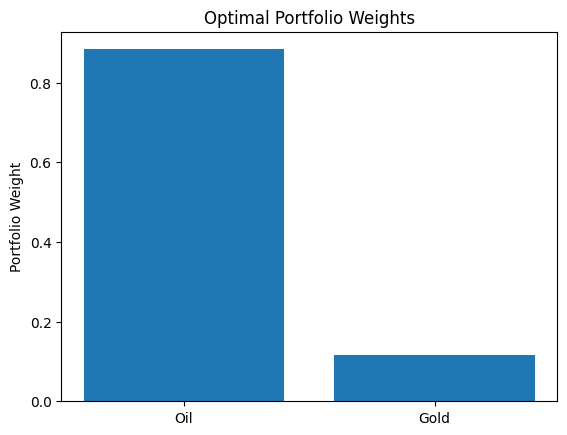

In [42]:
# Example objective function for portfolio optimization
def portfolio_objective(weights, returns, cov_matrix):
    portfolio_return = np.dot(returns, weights)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return -portfolio_return / portfolio_volatility  # Minimize negative Sharpe ratio

# Define the PSO algorithm for portfolio optimization
def pso_portfolio(returns, cov_matrix, num_assets, num_particles=30, max_iter=100, w=0.5, c1=1, c2=2):
    # Initialize particles and velocities representing portfolio weights
    particles = np.random.rand(num_particles, num_assets)
    particles /= particles.sum(axis=1, keepdims=True)  # Normalize to ensure weights sum to 1
    velocities = np.zeros_like(particles)

    # Initialize the best positions and fitness values
    best_positions = np.copy(particles)
    best_fitness = np.array([portfolio_objective(p, returns, cov_matrix) for p in particles])
    swarm_best_position = best_positions[np.argmin(best_fitness)]
    swarm_best_fitness = np.min(best_fitness)

    # Iterate through the specified number of iterations, updating the velocity and position of each particle at each iteration
    for i in range(max_iter):
        # Update velocities
        r1 = np.random.uniform(0, 1, (num_particles, num_assets))
        r2 = np.random.uniform(0, 1, (num_particles, num_assets))
        velocities = w * velocities + c1 * r1 * (best_positions - particles) + c2 * r2 * (swarm_best_position - particles)

        # Update positions and normalize weights
        particles += velocities
        particles /= particles.sum(axis=1, keepdims=True)

        # Evaluate fitness of each particle
        fitness_values = np.array([portfolio_objective(p, returns, cov_matrix) for p in particles])

        # Update best positions and fitness values
        improved_indices = np.where(fitness_values < best_fitness)
        best_positions[improved_indices] = particles[improved_indices]
        best_fitness[improved_indices] = fitness_values[improved_indices]
        if np.min(fitness_values) < swarm_best_fitness:
            swarm_best_position = particles[np.argmin(fitness_values)]
            swarm_best_fitness = np.min(fitness_values)

    # Return the best solution found by the PSO algorithm
    return swarm_best_position, -swarm_best_fitness  # Return the positive Sharpe ratio

# Example data for portfolio optimization
# # Example: Historical stock price data
# data = {
#     'Date': ['2023-01-01', '2023-01-02', '2023-01-03', '2023-01-04', '2023-01-05'],
#     'Stock1': [100, 105, 98, 110, 102],
#     'Stock2': [80, 85, 88, 92, 95],
#     'Stock3': [120, 115, 118, 110, 105]
# }

# df = pd.DataFrame(data)
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# # Print the DataFrame
# print(df)

# num_columns = df.shape[1]
# print(num_columns)

# num_assets = num_columns

# df = pd.DataFrame(data)
# df['Date'] = pd.to_datetime(df['Date'])
# df.set_index('Date', inplace=True)

# # Calculate daily returns
# daily_returns = df.pct_change()

num_assets = your_dataframe_cleaned.shape[1]

# Drop NaN values in the returns
#daily_returns = daily_returns.dropna()
daily_returns = your_dataframe_cleaned 


# Calculate covariance matrix
cov_matrix = np.cov(daily_returns, rowvar=False)


returns = daily_returns.mean().to_numpy()

# Print the results
print("Returns:")
print(daily_returns)
print(returns)
print("\nCovariance Matrix:")
print(cov_matrix)



# Run the PSO algorithm on the portfolio optimization problem
solution, fitness = pso_portfolio(returns, cov_matrix, num_assets)


# Print the solution (portfolio weights) and fitness value (Sharpe ratio)
print('Portfolio Weights:', solution)
print('Sharpe Ratio:', fitness)

# Visualization (2D for simplicity)
fig, ax = plt.subplots()
ax.bar(range(num_assets), solution)
asset_labels = ['Oil', 'Gold']
ax.set_xticks(range(len(asset_labels)))
ax.set_xticklabels(asset_labels)
ax.set_ylabel('Portfolio Weight')
ax.set_title('Optimal Portfolio Weights')
plt.show()
